In [1]:
import sys
import numpy as np

In [2]:
sys.path.append('../')
from src.mechanism.contest_game import ContestGame
from src.game import Game
from src.strategy import Strategy
from src.learner import SODA

In [36]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0.1 ,1.1], '2':[0.6, 1.6]}
a_space = {i:[0, 0.5] for i in bidder}
param_prior = {'distribution':'uniform'}

csf = 'ratio_form_valuation'
param_csf = 1

# parameter approximation game
n = m = 128

# parameter learner
max_iter = int(2e3)
tol = 1e-4
steprule_bool = True
eta = 10
beta = 1/20

In [37]:
# create mechanism
mechanism = ContestGame(bidder, o_space, a_space, param_prior, csf, param_csf)

In [38]:
# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

In [39]:
# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [40]:
# run soda
soda.run(game, strategies)

100%|████████████████████| 2.00k/2.00k [00:07<00:00, 276it/s]                                                                                             

No convergence
Current relative utility loss 0.015 %
Best relative utility loss 0.015 %


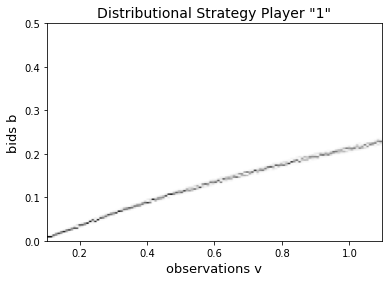

In [41]:
strategies['1'].plot()

### Compare with Numerical Solution

In [68]:
import matplotlib.pyplot as plt

In [69]:
u = mechanism.draw_values(200)
bids = np.array([ strategies['1'].bid(u[0]), strategies['2'].bid(u[1])])

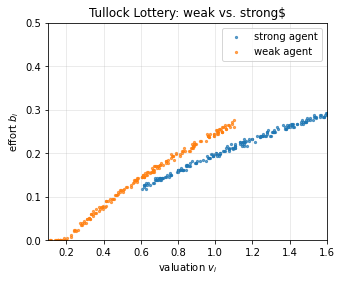

In [70]:
plt.figure(figsize=(5,4))
plt.scatter(u[1], bids[1], s=5, alpha=.7, color='tab:blue', label='strong agent')
plt.scatter(u[0], bids[0], s=5, alpha=.7, color='tab:orange', label='weak agent')
plt.legend()
plt.grid(alpha=.3)
plt.ylabel('effort $b_i$')
plt.xlabel('valuation $v_i$')
plt.ylim(0,0.5)
plt.xlim(0.1, 1.6)
plt.title('Tullock Lottery: weak vs. strong$')
plt.savefig('tullock_weak_strong.pdf')
plt.show()